In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## TIME SERIES

In [100]:
df=pd.read_csv("/Users/anuraggupta/Documents/ML EXAM/MonthWiseMarketArrivals_Clean.csv")

In [101]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


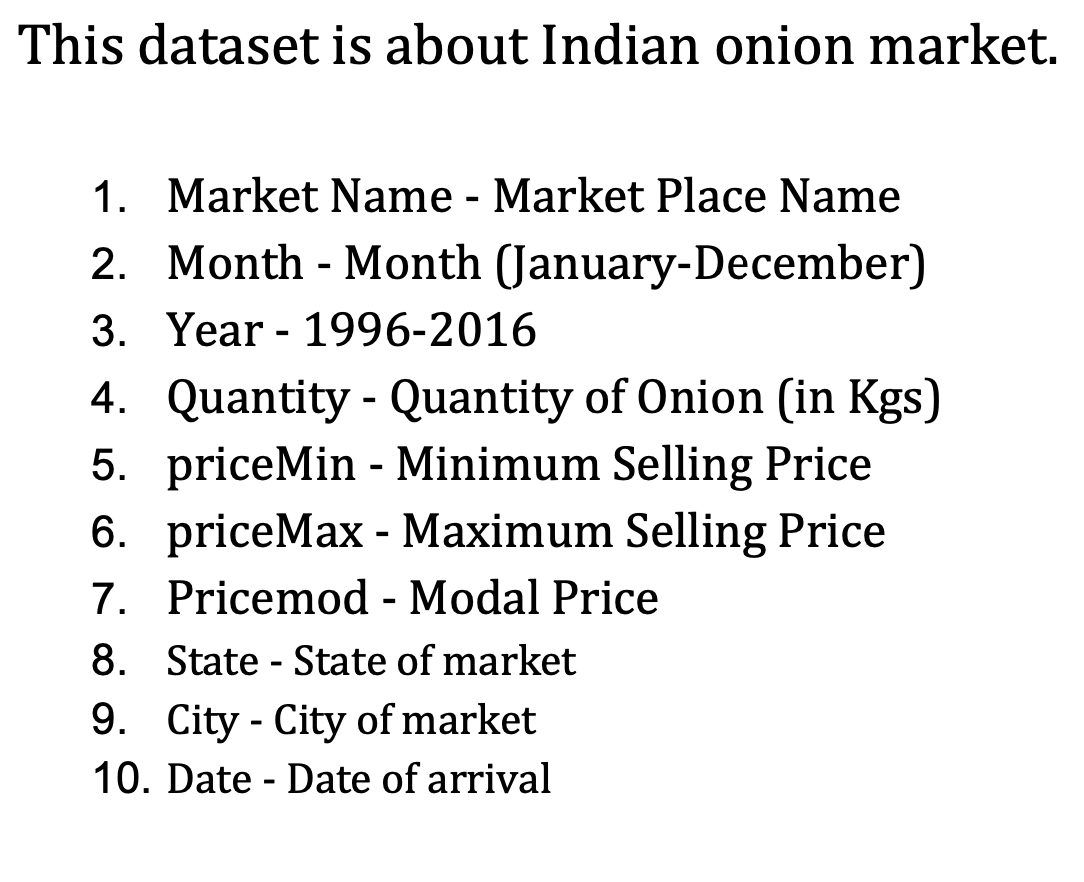

In [102]:
df.shape

(10227, 10)

In [103]:
df['market'].unique()

array(['ABOHAR(PB)', 'AGRA(UP)', 'AHMEDABAD(GUJ)', 'AHMEDNAGAR(MS)',
       'AJMER(RAJ)', 'ALIGARH(UP)', 'ALWAR(RAJ)', 'AMRITSAR(PB)',
       'BALLIA(UP)', 'BANGALORE', 'BAREILLY(UP)', 'BELGAUM(KNT)',
       'BHATINDA(PB)', 'BHAVNAGAR(GUJ)', 'BHOPAL', 'BHUBNESWER(OR)',
       'BIHARSHARIF(BHR)', 'BIJAPUR(KNT)', 'BIKANER(RAJ)', 'BOMBORI(MS)',
       'BURDWAN(WB)', 'CHAKAN(MS)', 'CHALLAKERE(KNT)', 'CHANDIGARH',
       'CHANDVAD(MS)', 'CHENNAI', 'CHICKBALLAPUR(KNT)',
       'COIMBATORE(TN) (bellary)', 'COIMBATORE(TN) (podisu)',
       'DEESA(GUJ)', 'DEHRADOON(UTT)', 'DELHI', 'DEORIA(UP)',
       'DEVALA(MS)', 'DEWAS(MP)', 'DHAVANGERE(KNT)', 'DHULIA(MS)',
       'DINDIGUL(TN)', 'DINDIGUL(TN)(Podis', 'DINDORI(MS)', 'ETAWAH(UP)',
       'GONDAL(GUJ)', 'GORAKHPUR(UP)', 'GUWAHATI', 'HALDWANI(UTT)',
       'HASSAN(KNT)', 'HOSHIARPUR(PB)', 'HUBLI(KNT)', 'HYDERABAD',
       'INDORE(MP)', 'JAIPUR', 'JALANDHAR(PB)', 'JALGAON(MS)',
       'JALGAON(WHITE)', 'JAMMU', 'JAMNAGAR(GUJ)', 'JODHPUR(RAJ)',
 

* Here i find out unique value of market column.

**Q1. Get the modal price of onion for each month for the Mumbai
market (Hint: set monthly date as index and drop
redundant columns)?**

In [104]:
oonion=df[df['market']=='MUMBAI']

* Here i am sorting the data on the basis of Mumbai.

In [105]:
onion=oonion[["date","priceMod"]]
onion.head()

,date,priceMod
6654,January-2004,849
6655,January-2005,387
6656,January-2006,402
6657,January-2007,997
6658,January-2008,448


* Here i am making new data with two column which is date and priceMod

In [106]:
onion.dtypes

date        object
priceMod     int64
dtype: object

In [107]:
onion['Date']=pd.to_datetime(onion['date'])

/var/folders/x_/sng69whx6gx_7r13bbztjcd00000gn/T/ipykernel_1481/2099925746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onion['Date']=pd.to_datetime(onion['date'])


* Here i am converting datatype of date 

In [108]:
onion.dtypes

date                object
priceMod             int64
Date        datetime64[ns]
dtype: object

In [109]:
onion.drop(columns=['date'],inplace=True)

/var/folders/x_/sng69whx6gx_7r13bbztjcd00000gn/T/ipykernel_1481/1949350881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onion.drop(columns=['date'],inplace=True)


In [110]:
onion.shape

(146, 2)

In [111]:
onion.reset_index(inplace=True)

* Here i am reseting the index

In [112]:
onion.head()
onion.drop(columns=['index'],inplace=True)

/var/folders/x_/sng69whx6gx_7r13bbztjcd00000gn/T/ipykernel_1481/4140799691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onion.drop(columns=['index'],inplace=True)


In [113]:
onion.head()

,priceMod,Date
0,849,2004-01-01
1,387,2005-01-01
2,402,2006-01-01
3,997,2007-01-01
4,448,2008-01-01


In [114]:
onion.sort_values(by='Date',inplace=True)

/var/folders/x_/sng69whx6gx_7r13bbztjcd00000gn/T/ipykernel_1481/552070605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onion.sort_values(by='Date',inplace=True)


* Here i am sorting value by date.

In [115]:
onion.min()

priceMod                    287
Date        2004-01-01 00:00:00
dtype: object

In [116]:
onion.max()

priceMod                   4714
Date        2016-02-01 00:00:00
dtype: object

In [117]:
onion['Date'].value_counts()

2004-01-01    1
2013-02-01    1
2011-10-01    1
2011-11-01    1
2011-12-01    1
             ..
2008-02-01    1
2008-03-01    1
2008-04-01    1
2008-05-01    1
2016-02-01    1
Name: Date, Length: 146, dtype: int64

In [118]:
onion.set_index(['Date'],inplace=True)

* Here i am making data as index.

In [119]:
onion.head()

,priceMod
Date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405


In [120]:
onion1=onion['priceMod'].resample("MS").mean()

In [121]:
onion1.head()

Date
2004-01-01    849.0
2004-02-01    736.0
2004-03-01    498.0
2004-04-01    397.0
2004-05-01    405.0
Freq: MS, Name: priceMod, dtype: float64

In [122]:
onion1.shape

(146,)

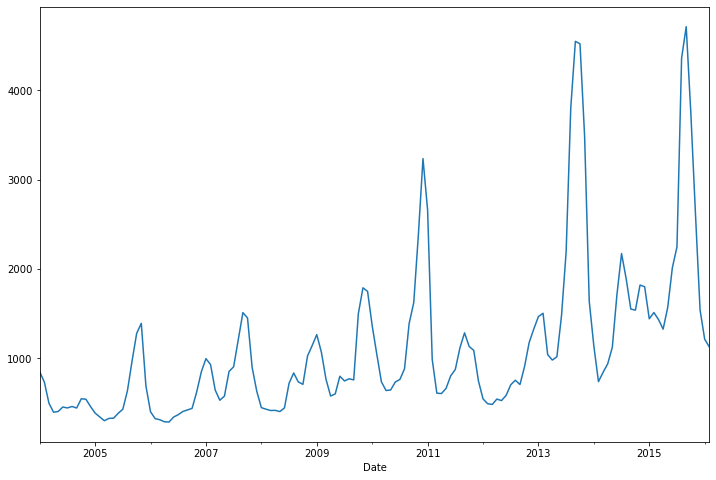

In [123]:
onion1.plot(figsize=(12,8))
plt.show()

In [124]:
decompose=seasonal_decompose(onion1,model='multiplicative',two_sided=False,extrapolate_trend=4)

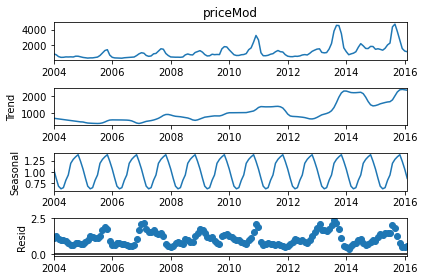

In [125]:
decompose.plot()
plt.show()

In [126]:
pd.DataFrame({"Actual":decompose.observed,"SI":decompose.seasonal,"Trend":decompose.trend,"IT":decompose.resid})

,Actual,SI,Trend,IT
Date,,,,
2004-01-01,849.0,1.060027,717.525000,1.116230
2004-02-01,736.0,0.850759,698.566667,1.238407
2004-03-01,498.0,0.673958,679.608333,1.087271
2004-04-01,397.0,0.614883,660.650000,0.977296
2004-05-01,405.0,0.640773,641.691667,0.984974
...,...,...,...,...
2015-10-01,3748.0,1.336525,2241.250000,1.251216
2015-11-01,2623.0,1.383994,2366.666667,0.800806
2015-12-01,1542.0,1.235864,2389.250000,0.522218


In [127]:
train=onion1['2004-01-01':'2013-12-01']
test=onion1['2013-12-01':'2015-12-01']

In [128]:
train.tail()

Date
2013-08-01    3803.0
2013-09-01    4550.0
2013-10-01    4522.0
2013-11-01    3484.0
2013-12-01    1639.0
Freq: MS, Name: priceMod, dtype: float64

In [129]:
test.head()

Date
2013-12-01    1639.0
2014-01-01    1138.0
2014-02-01     739.0
2014-03-01     844.0
2014-04-01     939.0
Freq: MS, Name: priceMod, dtype: float64

**Q2. Build time series model and check the performance of the 
model using RMSE**

In [130]:
from statsmodels.tsa.stattools import adfuller

In [131]:
# NUll - series is not stationary
# ALTERNATIVE - series is stationary
# Decision : if p > .05, - series is not stationary
#            if p <= .05, - series is stationay

In [132]:
adfuller(onion1)

(-4.437736321058303,
 0.00025436714348672806,
 2,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 1909.6057017652388)

* Data is Stationary.

In [134]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train,order=(2,1,14),seasonal_order=(2,1,14,24),
                               enforce_stationarity=False,
                               enforce_invertibility=False).fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           33     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   33      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [148]:
import itertools

In [135]:
model.forecast(12)

2014-01-01    1019.232358
2014-02-01    1317.876651
2014-03-01    1626.324139
2014-04-01    1819.071164
2014-05-01    1849.043698
2014-06-01    1884.516203
2014-07-01    1927.756518
2014-08-01    1821.590920
2014-09-01    1668.936987
2014-10-01    1895.785954
2014-11-01    2234.841419
2014-12-01    2443.536013
Freq: MS, Name: predicted_mean, dtype: float64

In [136]:
test

Date
2013-12-01    1639.0
2014-01-01    1138.0
2014-02-01     739.0
2014-03-01     844.0
2014-04-01     939.0
2014-05-01    1124.0
2014-06-01    1715.0
2014-07-01    2174.0
2014-08-01    1891.0
2014-09-01    1552.0
2014-10-01    1540.0
2014-11-01    1821.0
2014-12-01    1802.0
2015-01-01    1443.0
2015-02-01    1513.0
2015-03-01    1435.0
2015-04-01    1327.0
2015-05-01    1572.0
2015-06-01    2015.0
2015-07-01    2248.0
2015-08-01    4361.0
2015-09-01    4714.0
2015-10-01    3748.0
2015-11-01    2623.0
2015-12-01    1542.0
Freq: MS, Name: priceMod, dtype: float64

In [137]:
forecastarima=model.forecast(12)
forecastarima

2014-01-01    1019.232358
2014-02-01    1317.876651
2014-03-01    1626.324139
2014-04-01    1819.071164
2014-05-01    1849.043698
2014-06-01    1884.516203
2014-07-01    1927.756518
2014-08-01    1821.590920
2014-09-01    1668.936987
2014-10-01    1895.785954
2014-11-01    2234.841419
2014-12-01    2443.536013
Freq: MS, Name: predicted_mean, dtype: float64

In [138]:
print("RMSE",np.sqrt(np.mean((forecastarima-test)**(2))))

RMSE 506.5182540966448


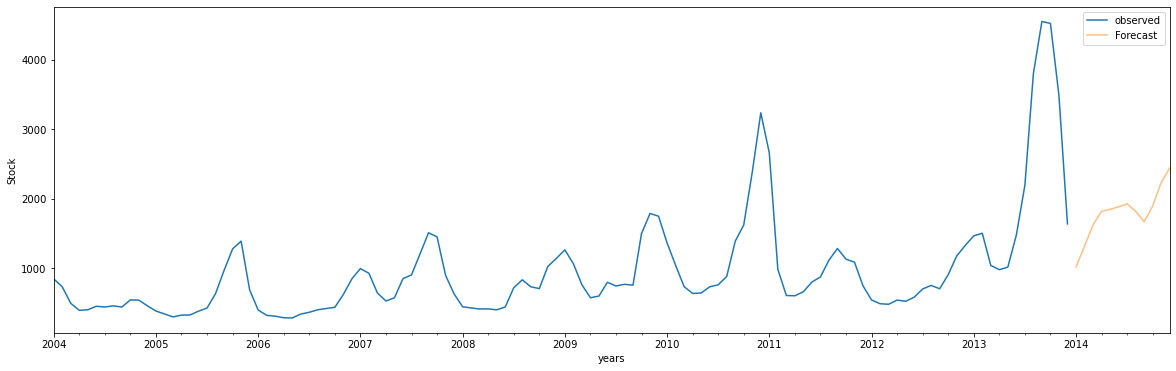

In [139]:
# plot the forecast along with the confidence band
axis=train.plot(label='observed',figsize=(20,6))
forecastarima.plot(ax=axis,label='Forecast',alpha=.5)

axis.set_xlabel('years')
axis.set_ylabel('Stock')
plt.legend(loc='best')
plt.show()

**Q3. Plot ACF and PACF plots**

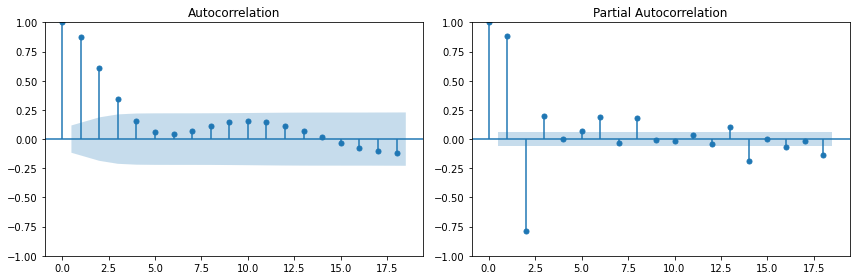

In [140]:
import statsmodels.tsa.api as smt
fig, axes=plt.subplots(1,2,sharey=False,sharex=False) # sharex for giving same value to 
                                                          #both graph x axis
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(train,lags=18,ax=axes[0],alpha=.2)
smt.graphics.plot_pacf(train,lags=18,ax=axes[1],alpha=.5,method='ols')
plt.tight_layout()

**Q4. Exponential smoothing using Holt-Winter’s technique and 
Forecast onion price for Mumbai market**

In [141]:
alpha=.6
beta=.2
gamma=.4

ets_model=ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12)
ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)

/var/folders/x_/sng69whx6gx_7r13bbztjcd00000gn/T/ipykernel_1481/3080053561.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)
/Users/anuraggupta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


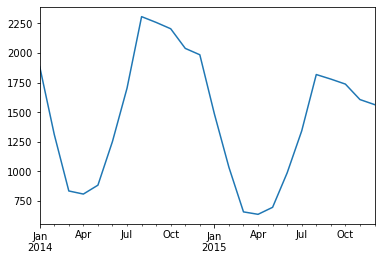

In [142]:
ets_fit.forecast(24).plot()
plt.show()

In [143]:
pred_y=ets_fit.forecast(6)

In [144]:
pred_y

2014-01-01    1885.693837
2014-02-01    1311.712803
2014-03-01     833.618627
2014-04-01     807.487987
2014-05-01     882.674540
2014-06-01    1252.623133
Freq: MS, dtype: float64

In [145]:
test

Date
2013-12-01    1639.0
2014-01-01    1138.0
2014-02-01     739.0
2014-03-01     844.0
2014-04-01     939.0
2014-05-01    1124.0
2014-06-01    1715.0
2014-07-01    2174.0
2014-08-01    1891.0
2014-09-01    1552.0
2014-10-01    1540.0
2014-11-01    1821.0
2014-12-01    1802.0
2015-01-01    1443.0
2015-02-01    1513.0
2015-03-01    1435.0
2015-04-01    1327.0
2015-05-01    1572.0
2015-06-01    2015.0
2015-07-01    2248.0
2015-08-01    4361.0
2015-09-01    4714.0
2015-10-01    3748.0
2015-11-01    2623.0
2015-12-01    1542.0
Freq: MS, Name: priceMod, dtype: float64

In [146]:
print("RMSE",np.sqrt(np.mean((pred_y-test)**(2))))

RMSE 442.8091305892096
